<a href="https://colab.research.google.com/github/Mahmoud67-stack/sds_challenges/blob/master/Q_Learning_for_maze_solving.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AI for Logistics - Robots in a warehouse

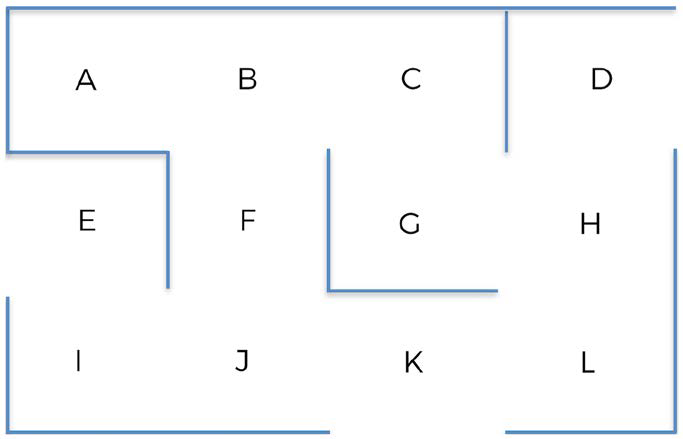

## Importing the libraries

In [ ]:
import numpy as np

## Setting the parameters gamma and alpha for the Q-learning

In [ ]:
gamma = 0.75 # The dicount factor for teh Q-value after each action

alpha = 0.9 # The learning rate of the Q-value after each action

## PART 1 - Building the Environment

### Define the sates

In [ ]:
states = {'A':0,
         'B':1,
         'C':2,
         'D':3,
         'E':4,
         'F':5,
         'G':6,
         'H':7,
         'I':8,
         'J':9,
         'K':10,
         'L':11}

### Define the actions

In [ ]:
actions = [0,1,2,3,4,5,6,7,8,9,10,11]

### Define the rewards

In [ ]:
R = np.array([[0,1,0,0,0,0,0,0,0,0,0,0],
              [1,0,1,0,0,1,0,0,0,0,0,0],
              [0,1,0,0,0,0,1,0,0,0,0,0],
              [0,0,0,0,0,0,0,1,0,0,0,0],
              [0,0,0,0,0,0,0,0,1,0,0,0],
              [0,1,0,0,0,0,0,0,0,1,0,0],
              [0,0,1,0,0,0,1000,1,0,0,0,0],
              [0,0,0,1,0,0,1,0,0,0,0,1],
              [0,0,0,0,1,0,0,0,0,1,0,0],
              [0,0,0,0,0,1,0,0,1,0,1,0],
              [0,0,0,0,0,0,0,0,0,1,0,1],
              [0,0,0,0,0,0,0,1,0,0,1,0]])

## PART 2 - Building the AI Solution with Q-Learning

### Initializing the Q-values

In [ ]:
Q = np.array(np.zeros([12, 12]))

### Implementing the Q-Learning process

In [ ]:
for __ in range(1000):
    current_state = np.random.randint(0, 12)
    playable_actions = []
    for j in range(12):
        if R[current_state, j] > 0:
            playable_actions.append(j)
    next_state = np.random.choice(playable_actions)
    TD = R[current_state, next_state] + gamma*Q[next_state, np.argmax(Q[next_state])] - Q[current_state, next_state]
    Q[current_state, next_state] = Q[current_state, next_state] + alpha*TD

print("Q-values: ")
print(Q.astype(int))

Q-values: 
[[   0 1689    0    0    0    0    0    0    0    0    0    0]
 [1267    0 2250    0    0 1267    0    0    0    0    0    0]
 [   0 1689    0    0    0    0 2999    0    0    0    0    0]
 [   0    0    0    0    0    0    0 2250    0    0    0    0]
 [   0    0    0    0    0    0    0    0  714    0    0    0]
 [   0 1689    0    0    0    0    0    0    0  951    0    0]
 [   0    0 2250    0    0    0 3998 2250    0    0    0    0]
 [   0    0    0 1688    0    0 2999    0    0    0    0 1688]
 [   0    0    0    0  537    0    0    0    0  951    0    0]
 [   0    0    0    0    0 1267    0    0  714    0 1266    0]
 [   0    0    0    0    0    0    0    0    0  951    0 1688]
 [   0    0    0    0    0    0    0 2250    0    0 1267    0]]


## PART 3 - Going into Production

### Making a mapping from the states to the locations

In [ ]:
state_to_location = {state: location for location, state in states.items()}

In [ ]:
state_to_location

{0: 'A',
 1: 'B',
 2: 'C',
 3: 'D',
 4: 'E',
 5: 'F',
 6: 'G',
 7: 'H',
 8: 'I',
 9: 'J',
 10: 'K',
 11: 'L'}

### Making the final function that will return the optimal route

In [ ]:
def route(starting_location, ending_location):
    route = [starting_location]
    next_location = starting_location
    
    while (next_location != ending_location):
        starting_state = states[starting_location]
        next_state = np.argmax(Q[starting_state,])
        next_location = state_to_location[next_state]
        route.append(next_location)
        starting_location = next_location
        
    return route

### Printing the final route from E to G

In [ ]:
print('Route from E to G: ')
route('E', 'G')

Route from E to G: 


['E', 'I', 'J', 'F', 'B', 'C', 'G']

# Improvements to the algorithm

## Improvement 1 - Automating reward attribution

### Defining the states

In [ ]:
location_to_state = {'A':0,
                     'B':1,
                     'C':2,         
                     'D':3,
                     'E':4,
                     'F':5,
                     'G':6,
                     'H':7,         
                     'I':8,
                     'J':9,
                     'K':10,
                     'L':11}

### Defining the actions

In [ ]:
actions = [0,1,2,3,4,5,6,7,8,9,10,11]

### Defining the rewards

In [ ]:
R = np.array([[0,1,0,0,0,0,0,0,0,0,0,0],
[1,0,1,0,0,1,0,0,0,0,0,0],
[0,1,0,0,0,0,1,0,0,0,0,0],
[0,0,0,0,0,0,0,1,0,0,0,0],
[0,0,0,0,0,0,0,0,1,0,0,0],
[0,1,0,0,0,0,0,0,0,1,0,0],
[0,0,1,0,0,0,1,1,0,0,0,0],
[0,0,0,1,0,0,1,0,0,0,0,1],
[0,0,0,0,1,0,0,0,0,1,0,0],
[0,0,0,0,0,1,0,0,1,0,1,0],
[0,0,0,0,0,0,0,0,0,1,0,1],
[0,0,0,0,0,0,0,1,0,0,1,0]])

In [ ]:
def Q(ending_location):
    R_new = np.copy(R)
    ending_state = location_to_state[ending_location]
    R_new[ending_state, ending_state] = 1000
    Q_new = np.array(np.zeros([12, 12]))

    for __ in range(1000):
        current_state = np.random.randint(0, 12)
        playable_actions = []
        for j in range(12):
            if R_new[current_state, j] > 0:
                playable_actions.append(j)
        next_state = np.random.choice(playable_actions)
        TD = R_new[current_state, next_state] + gamma*Q_new[next_state, np.argmax(Q_new[next_state])] - Q_new[current_state, next_state]
        Q_new[current_state, next_state] = Q_new[current_state, next_state] + alpha*TD
    return Q_new

### Making the final function that will return the optimal route

In [ ]:
def route2(starting_location, ending_location):
    route = [starting_location]
    next_location = starting_location
    Q_new = Q(ending_location)
    while next_location != ending_location:
        starting_state = location_to_state[next_location]
        best_action = np.argmax(Q_new[starting_state])
        next_location = state_to_location[best_action]
        route.append(next_location)
        
    return route

In [ ]:
route2('D', 'L')

['D', 'H', 'L']

In [ ]:
for key in location_to_state.keys():
    for key2 in  state_to_location.keys():
        print(route2(key, state_to_location[key2]))

['A']
['A', 'B']
['A', 'B', 'C']
['A', 'B', 'C', 'G', 'H', 'D']
['A', 'B', 'F', 'J', 'I', 'E']
['A', 'B', 'F']
['A', 'B', 'C', 'G']
['A', 'B', 'C', 'G', 'H']
['A', 'B', 'F', 'J', 'I']
['A', 'B', 'F', 'J']
['A', 'B', 'F', 'J', 'K']
['A', 'B', 'C', 'G', 'H', 'L']
['B', 'A']
['B']
['B', 'C']
['B', 'C', 'G', 'H', 'D']
['B', 'F', 'J', 'I', 'E']
['B', 'F']
['B', 'C', 'G']
['B', 'C', 'G', 'H']
['B', 'F', 'J', 'I']
['B', 'F', 'J']
['B', 'F', 'J', 'K']
['B', 'F', 'J', 'K', 'L']
['C', 'B', 'A']
['C', 'B']
['C']
['C', 'G', 'H', 'D']
['C', 'B', 'F', 'J', 'I', 'E']
['C', 'B', 'F']
['C', 'G']
['C', 'G', 'H']
['C', 'B', 'F', 'J', 'I']
['C', 'B', 'F', 'J']
['C', 'B', 'F', 'J', 'K']
['C', 'G', 'H', 'L']
['D', 'H', 'G', 'C', 'B', 'A']
['D', 'H', 'G', 'C', 'B']
['D', 'H', 'G', 'C']
['D']
['D', 'H', 'L', 'K', 'J', 'I', 'E']
['D', 'H', 'L', 'K', 'J', 'F']
['D', 'H', 'G']
['D', 'H']
['D', 'H', 'L', 'K', 'J', 'I']
['D', 'H', 'L', 'K', 'J']
['D', 'H', 'L', 'K']
['D', 'H', 'L']
['E', 'I', 'J', 'F', 'B', 'A']
[

## Improvement 2 -  Adding an intermediate goal


### Making the final function that returns the optimal route

In [ ]:
def best_route(starting_location, intermediary_location, ending_location):
  return route2(starting_location, intermediary_location)+ route2(intermediary_location, ending_location)[1:]

### Prinitng the final route

In [ ]:
print('Route:')
best_route('E', 'B', 'L')

Route:


['E', 'I', 'J', 'F', 'B', 'F', 'J', 'K', 'L']